In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')

Data Visualization

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sandi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


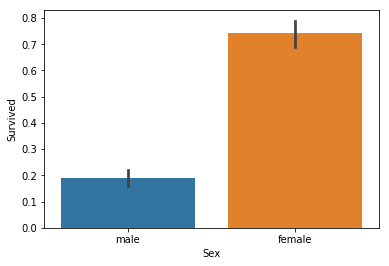

In [7]:
sns.barplot(data = train_df, x='Sex', y='Survived')

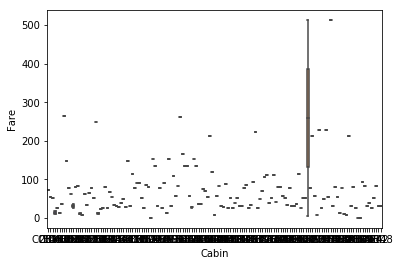

In [8]:
sns.boxplot(data = train_df, x='Cabin', y='Fare',palette='rainbow')

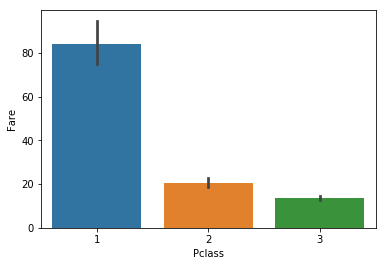

In [9]:
sns.barplot(data = train_df, x='Pclass', y='Fare')

In [10]:
train_df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [11]:
train_df.groupby('Pclass')['Fare'].min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

In [12]:
train_df[(train_df['Pclass']==1) & (train_df['Fare'] < 69)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [13]:
cols_to_keep = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [14]:
train_df_filtered = train_df[cols_to_keep]

In [15]:
train_df_filtered.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
train_df_filtered.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
train_df_cat = pd.get_dummies(train_df_filtered,['Sex','Embarked'],drop_first=True)

In [18]:
train_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [19]:
train_df_cat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
train_df_cat['Age'].fillna('0',inplace = True)

In [21]:
train_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null object
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int64(4), object(1), uint8(3)
memory usage: 44.5+ KB


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
Y = train_df_cat['Survived']

In [24]:
X = train_df_cat.drop('Survived', axis =1)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=600)

In [28]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
import pickle

In [30]:
filename = 'randomforestmodel.pkl'

In [31]:
pickle.dump(rfc,open(filename, 'wb'))

In [32]:
loaded_model = pickle.load(open(filename, 'rb'))

In [36]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.500,1,0,1
700,1,18,1,0,227.525,0,0,0
748,1,19,1,0,53.100,1,0,1
751,3,6,0,1,12.475,1,0,1
481,2,0,0,0,0.000,1,0,1


In [34]:
predictions = loaded_model.predict(X_test.head(1))

In [35]:
print(predictions[0])

0


In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       154
           1       0.77      0.68      0.73       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [36]:
print(confusion_matrix(Y_test,predictions))

[[131  23]
 [ 36  78]]


Predict on the Test Data

In [37]:
test_df = pd.read_csv('test.csv')

In [38]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
cols_to_keep_test = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']


In [40]:
test_df_filtered = test_df[cols_to_keep_test]

In [41]:
test_df_filtered.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [42]:
test_df_cat = pd.get_dummies(test_df_filtered,['Sex','Embarked'],drop_first=True)

In [43]:
test_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [44]:
test_df_cat['Age'].fillna('0',inplace = True)

In [45]:
from sklearn.externals import joblib

In [46]:
joblib.dump(rfc,'rfmodel.pkl')

['rfmodel.pkl']

In [47]:
model = joblib.load('rfmodel.pkl')

In [48]:
test_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Age           418 non-null object
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(1), int64(3), object(1), uint8(3)
memory usage: 17.6+ KB


In [49]:
test_df_cat.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47,1,0,7.0000,0,0,1
2,2,62,0,0,9.6875,1,1,0
3,3,27,0,0,8.6625,1,0,1
4,3,22,1,1,12.2875,0,0,1


In [50]:
mean_fare = test_df_cat["Fare"].mean()

In [51]:
mean_fare

35.6271884892086

In [52]:
test_df_cat[test_df_cat['Fare'].isnull()]

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
152,3,60.5,0,0,NaN,1,0,1


In [53]:
test_df_cat['Fare'].fillna(mean_fare,inplace = True)

In [54]:
test_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Age           418 non-null object
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(1), int64(3), object(1), uint8(3)
memory usage: 17.6+ KB


In [55]:
test_prediction = model.predict(test_df_cat)

In [56]:
len(test_prediction)

418

In [57]:
results_df = test_df['PassengerId'] 

In [58]:
test_prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
results_df

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [60]:
results_df = pd.concat([results_df,pd.DataFrame(test_prediction,columns=['prediction'])], axis=1)

In [61]:
results_df.head()

,PassengerId,prediction
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [149]:
results_df.to_csv('titanic_predictions.csv', sep=',')

Hyperparameter Tuning

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
rfr = RandomForestRegressor(random_state = 42)

In [153]:
from pprint import pprint

In [154]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Create a parameter grid

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [208]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 1000, num = 20)]

In [209]:
n_estimators

[5,
 57,
 109,
 162,
 214,
 266,
 319,
 371,
 423,
 476,
 528,
 581,
 633,
 685,
 738,
 790,
 842,
 895,
 947,
 1000]

In [210]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [211]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 10, num = 7)]

In [212]:
max_depth

[3, 4, 5, 6, 7, 8, 10]

In [213]:
max_depth.append(None)

In [214]:
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]

In [215]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [216]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [217]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [5,
                  57,
                  109,
                  162,
                  214,
                  266,
                  319,
                  371,
                  423,
                  476,
                  528,
                  581,
                  633,
                  685,
                  738,
                  790,
                  842,
                  895,
                  947,
                  1000]}


In [218]:
rfr = RandomForestClassifier()

In [225]:
rfr_search = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid,n_iter=100, cv=4, verbose=2, n_jobs =-1)

In [226]:
rfr_search.fit(X_train,Y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.8min finished


RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [5, 57, 109, 162, 214, 266, 319, 371, 423, 476, 528, 581, 633, 685, 738, 790, 842, 895, 947, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7, 8, 10, None], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [227]:
rfr_search.best_params_

{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 214}

In [228]:
predictions_rfr = rfr_search.best_estimator_.predict(X_test)

In [229]:
print(classification_report(Y_test,predictions_rfr))

             precision    recall  f1-score   support

          0       0.75      0.93      0.83       154
          1       0.86      0.59      0.70       114

avg / total       0.80      0.78      0.77       268



In [230]:
print(confusion_matrix(Y_test,predictions))

[[133  21]
 [ 39  75]]


array([0.30676097, 0.93598415, 0.4603165 , 0.16014594, 0.13243254,
       0.10673225, 0.3629106 , 0.11623091, 0.84398184, 0.61980237,
       0.13243254, 0.15422101, 0.55408813, 0.10753208, 0.19233042,
       0.14870749, 0.29533068, 0.12630462, 0.14141563, 0.82457056,
       0.15422101, 0.10208205, 0.71031134, 0.61980237, 0.13686843,
       0.25610593, 0.12630462, 0.19903798, 0.21512553, 0.23031364,
       0.68577727, 0.44092049, 0.71031134, 0.21535968, 0.17794441,
       0.86099132, 0.13544847, 0.13686843, 0.29098789, 0.4603165 ,
       0.37425383, 0.61980237, 0.87955482, 0.18843201, 0.17297934,
       0.3629106 , 0.09790539, 0.30676097, 0.1441473 , 0.13243254,
       0.75028451, 0.32427009, 0.82190288, 0.67287405, 0.71031134,
       0.09085294, 0.09668414, 0.10753208, 0.22885574, 0.89308898,
       0.87172821, 0.22907456, 0.11809589, 0.41784616, 0.10673225,
       0.16303861, 0.78790323, 0.40197653, 0.5349392 , 0.3629106 ,
       0.315442  , 0.05951653, 0.09668414, 0.10753208, 0.35215

In [41]:
!python --version

Python 3.7.1


In [38]:
import scipy
scipy.version.version

'1.1.0'

In [39]:
import sklearn
sklearn.__version__

'0.20.1'

In [40]:
!conda --version

conda 4.5.12


In [6]:
!conda info --envs

# conda environments:
#
base                  *  C:\Users\sandi\Anaconda3

